<a href="https://colab.research.google.com/github/A-Roopa/CodeTechTask-1/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Basic EDA**

**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier


**Load and Explore the Dataset**

In [ ]:
# Load the Iris dataset
df = pd.read_csv("/content/iris.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
# Display the first few rows and basic information about the dataset
print(df.head())
print(df.info())


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [ ]:
# Summary statistics
print(df.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


<Figure size 1200x800 with 0 Axes>

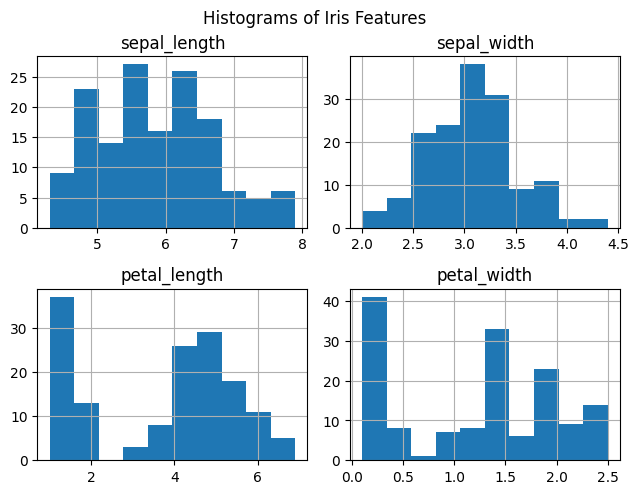

In [ ]:
# Histogram of each feature
plt.figure(figsize=(12, 8))
df.hist()
plt.tight_layout()
plt.suptitle("Histograms of Iris Features", y=1.02)
plt.show()

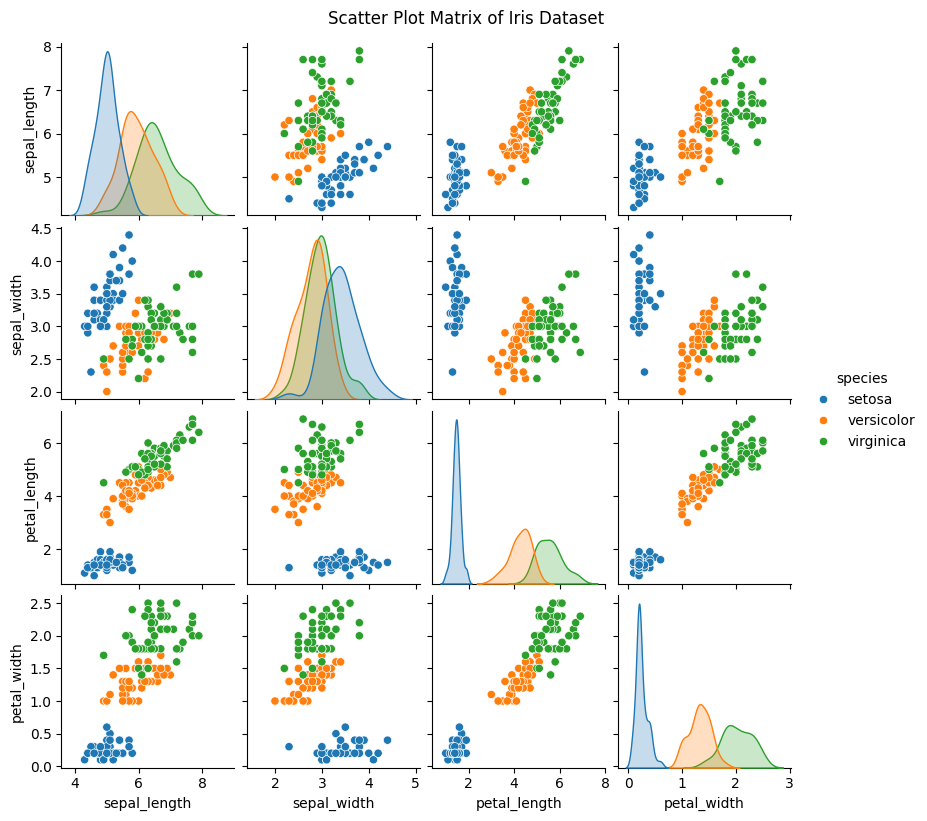

In [ ]:
# Scatter plot matrix
sns.pairplot(df, hue='species', height=2)
plt.suptitle("Scatter Plot Matrix of Iris Dataset", y=1.02)
plt.show()

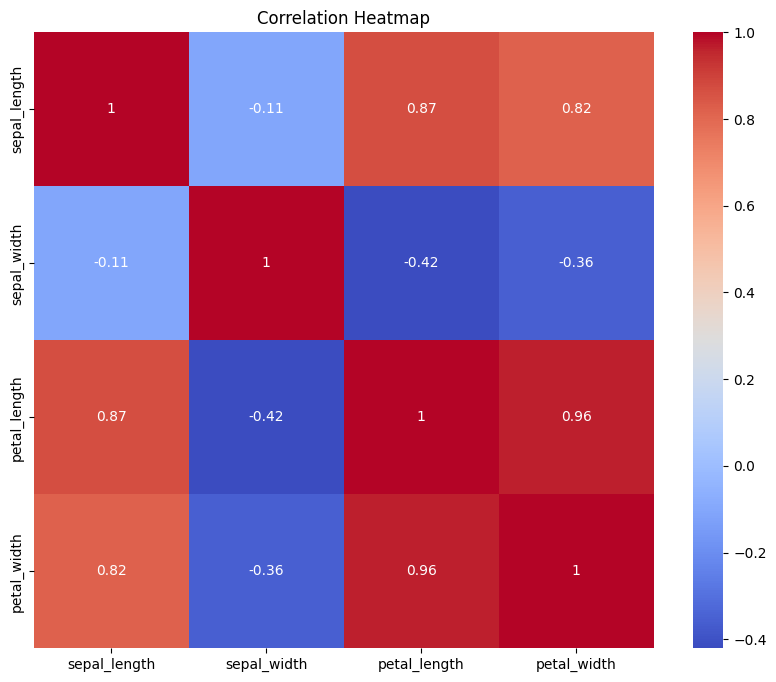

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

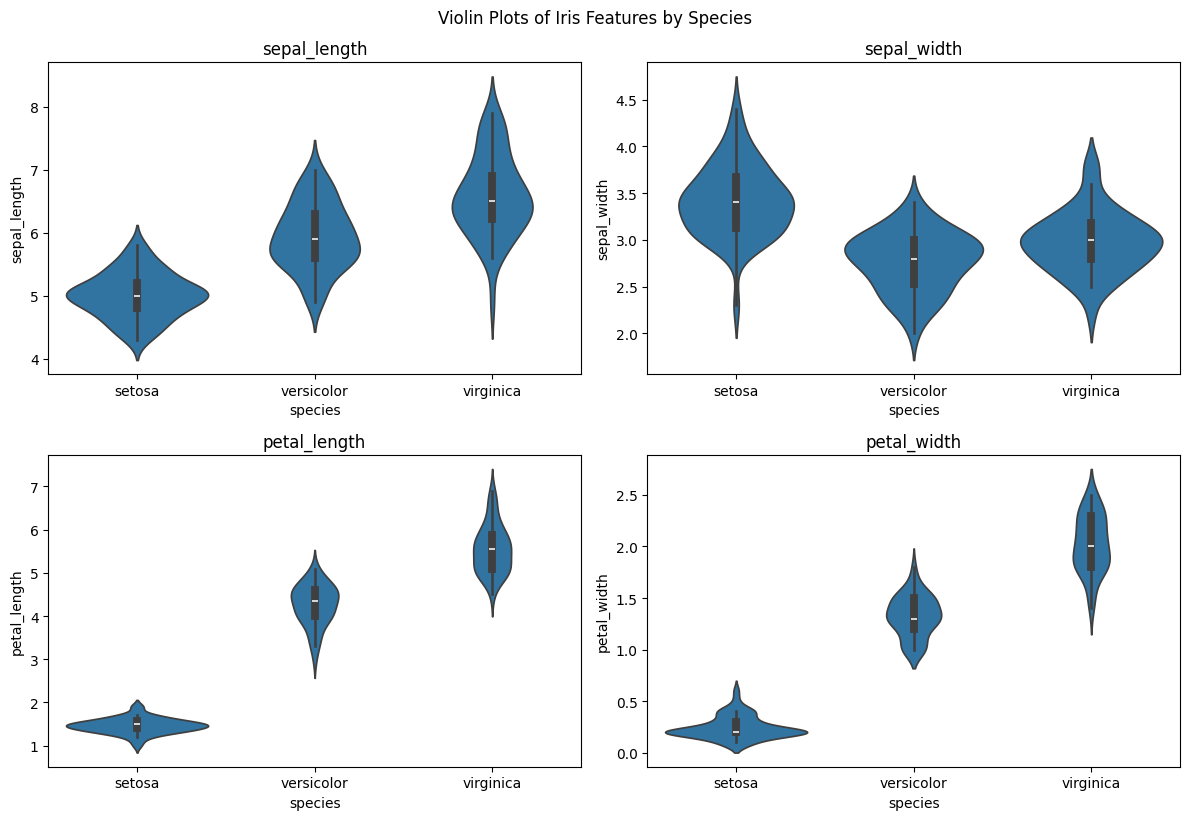

In [ ]:
 #Violin plots
plt.figure(figsize=(12, 8))
for i, feature in enumerate([col for col in df.columns if col != 'species']):
    plt.subplot(2, 2, i+1)
    sns.violinplot(x='species', y=feature, data=df)
    plt.title(feature)
plt.tight_layout()
plt.suptitle("Violin Plots of Iris Features by Species", y=1.02)
plt.show()

**Advanced Features**

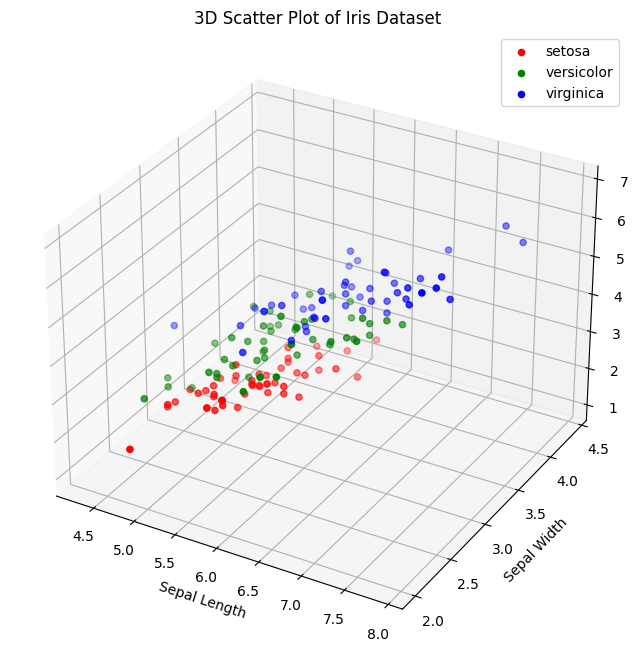

In [ ]:
 #3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
colors = {'setosa': 'r', 'versicolor': 'g', 'virginica': 'b'}
for species, color in colors.items():
    species_data = df[df['species'] == species]
    ax.scatter(species_data['sepal_length'], species_data['sepal_width'],
               species_data['petal_length'], c=color, label=species)
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
ax.legend()
plt.title('3D Scatter Plot of Iris Dataset')
plt.show()

**Feature Engineering**

In [ ]:
# 2. Feature Engineering

# Create ratio features
df['sepal_ratio'] = df['sepal_length'] / df['sepal_width']
df['petal_ratio'] = df['petal_length'] / df['petal_width']


**Dimensionality Reduction with PCA**

In [ ]:
# 3. Dimensionality Reduction with PCA

# Prepare data for PCA
X = df.drop('species', axis=1)
y = df['species']




**Standardize the features**

In [ ]:


# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


**Apply PCA**

In [ ]:

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

**Visualize PCA results**

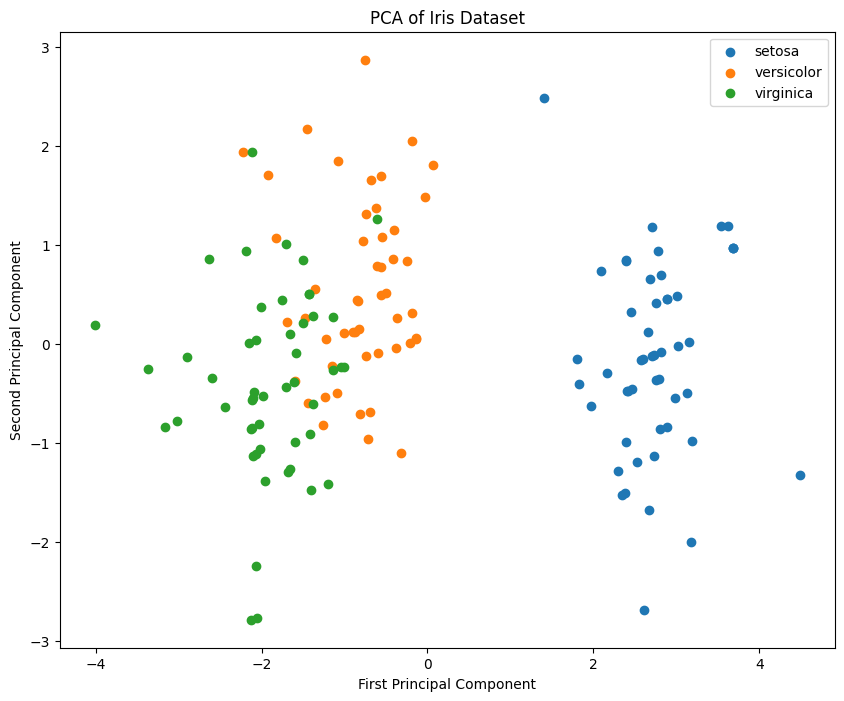

In [ ]:
# Visualize PCA results
plt.figure(figsize=(10, 8))
for species in df['species'].unique():
    mask = y == species
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], label=species)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.title('PCA of Iris Dataset')
plt.show()

**Machine Learning: SVM Classification**

In [ ]:
 #4. Machine Learning: SVM Classification

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train SVM model
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(X_test)


**Evaluate the model**

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



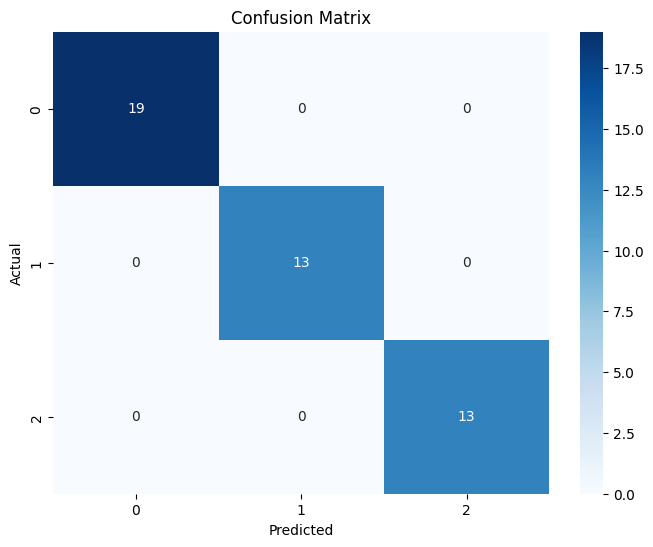

In [ ]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Clustering: K-means**

In [ ]:
# 5. Clustering: K-means

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


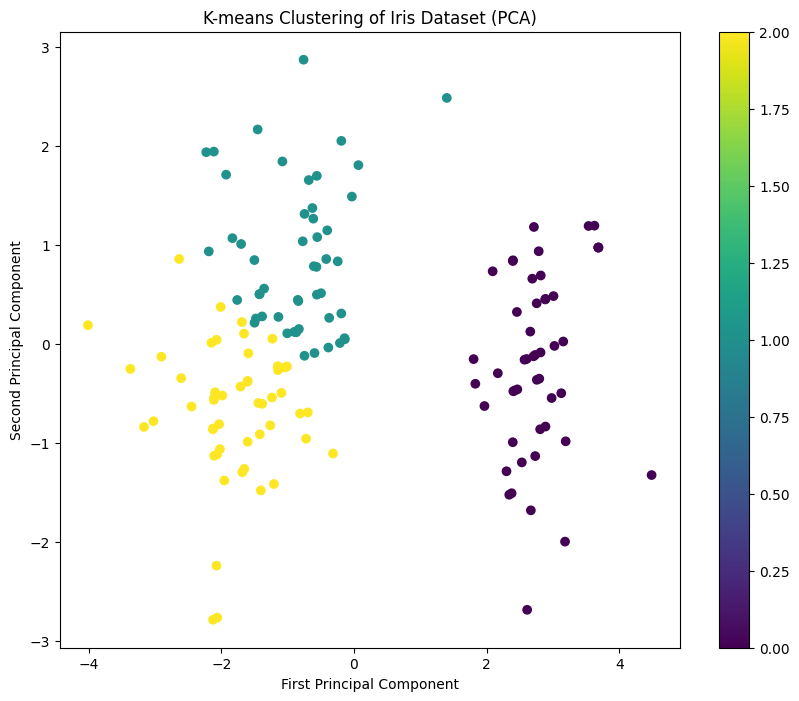

In [ ]:
# Visualize clustering results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('K-means Clustering of Iris Dataset (PCA)')
plt.colorbar(scatter)
plt.show()

**Feature Importance**

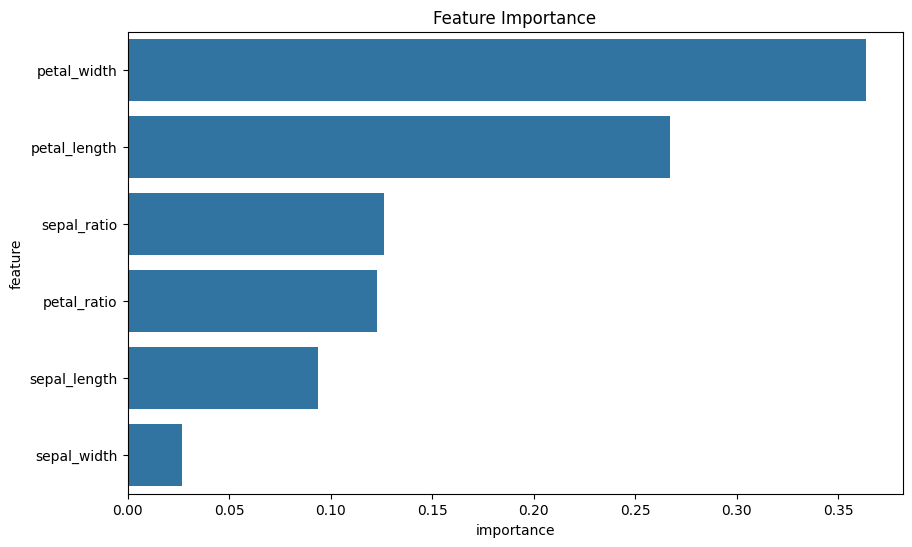

In [ ]:
# 6. Feature Importance

# Use Random Forest for feature importance
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Plot feature importances
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()